In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-tools') # or just install the module

In [3]:
from fuzzytools.files import search_for_filedirs
from lchandler import _C

root_folder = '../../surveys-save'
filedirs = search_for_filedirs(root_folder, fext=_C.EXT_RAW_LIGHTCURVE)

In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
from fuzzytools.progress_bars import ProgressBar
from fuzzytools.files import load_pickle, save_pickle
from fuzzytools.files import get_dict_from_filedir

filedir = f'../../surveys-save/survey=alerceZTFv7.1~bands=gr~mode=onlySNe.ralcds'
filedict = get_dict_from_filedir(filedir)
root_folder = filedict['_rootdir']
cfilename = filedict['_cfilename']
survey = filedict['survey']
lcdataset = load_pickle(filedir)
print(lcdataset)

LCDataset:
[outliers; samples 4]
(.) obs_samples=289; min_len=14; max_dur=408.0[days]; dur(p50)=222.1[days]; cadence(p50)=0.9[days]
(g) obs_samples=144; min_len=6; tmax=44.923828125; max_dur=408.0 [days]; dur(p50)=222.0 [days]; cadence(p50)=1.9 [days]
(r) obs_samples=145; min_len=8; tmax=212.09375; max_dur=376.0 [days]; dur(p50)=220.4 [days]; cadence(p50)=2.0 [days]
   |██      | SLSN - 1/4 (25.00%)
   |████    | SNIIbn - 2/4 (50.00%)
   |██      | SNIa - 1/4 (25.00%)
   |        | SNIbc - 0/4 (0.00%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[faint; samples 0]
empty lcset
────────────────────────────────────────────────────────────────────────────────────────────────────
[raw; samples 1,994]
(.) obs_samples=54,685; min_len=6; max_dur=538.8[days]; dur(p50)=52.9[days]; cadence(p50)=1.0[days]
(g) obs_samples=24,132; min_len=0; tmax=10.99609375; max_dur=538.8 [days]; dur(p50)=39.0 [days]; cadence(p50)=3.0 [days]
(r) obs_samples=30

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
g 11.725372


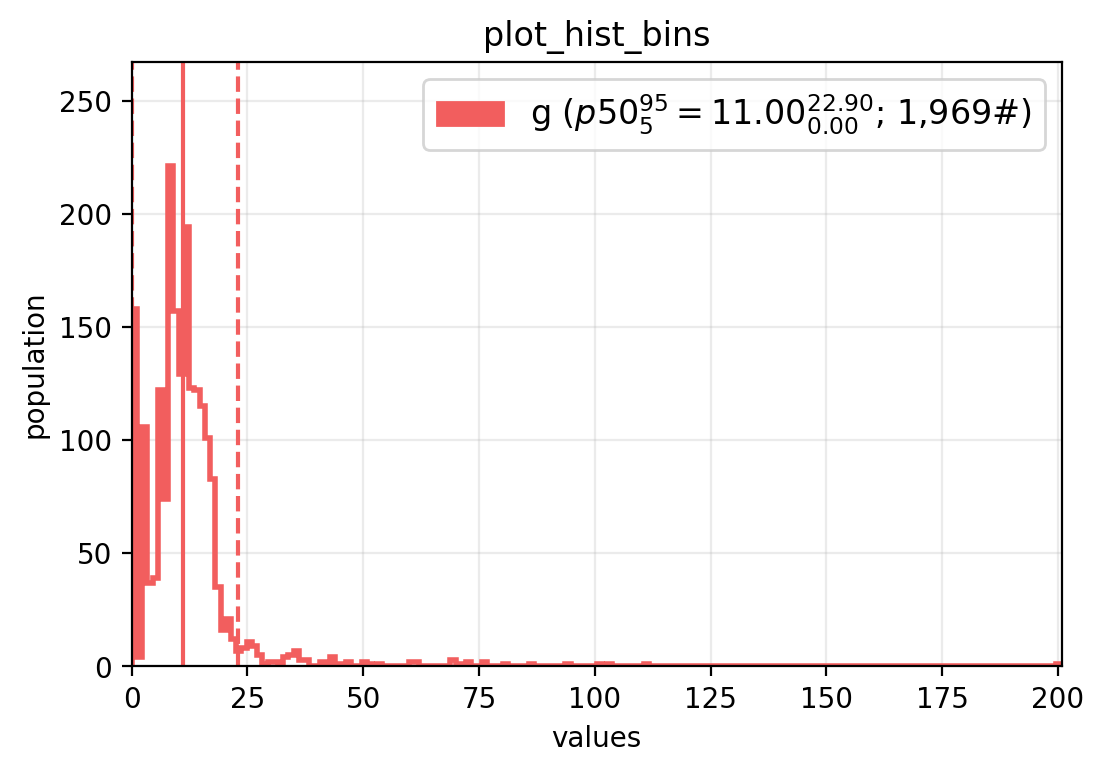

In [48]:
%load_ext autoreload
%autoreload 2
import numpy as np
import fuzzytools.matplotlib.plots as cplots
import pandas as pd

lcset = lcdataset['raw']
lcobj_names = lcset.get_lcobj_names()
b = 'g'
x = []
for lcobj_name in lcobj_names:
    lcobj = lcset[lcobj_name]
    lcobjb = lcobj.get_b(b)
    if len(lcobjb)>0:
        peak_day = lcobjb.get_max_brightness_time()
        first_day = np.min(lcobjb.days)
        last_day = np.max(lcobjb.days)
        #if first_day>0:
        x += [peak_day]
    
print(b,np.mean(x, axis=0))
plot_dict = {b:x,}
plot_df = pd.DataFrame.from_dict(plot_dict, orient='columns')
fig, ax = cplots.plot_hist_bins(plot_df)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


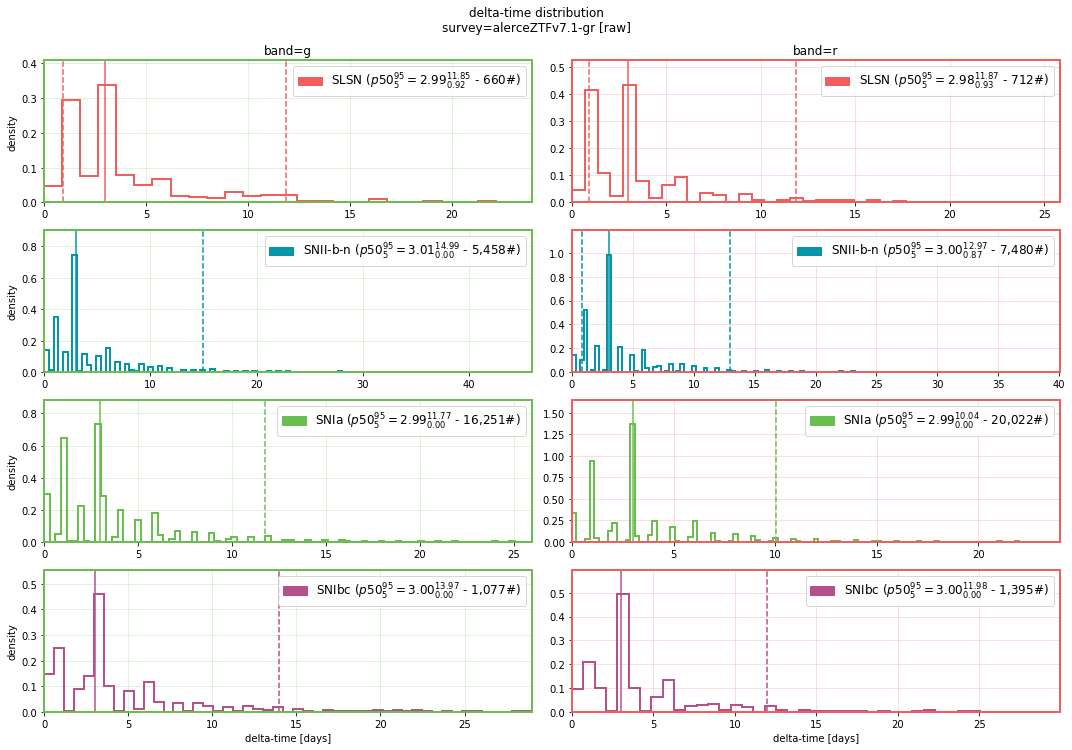

In [69]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.distrs import plot_values_distribution

lcset_name = 'raw'
lcset = lcdataset[lcset_name]
lcset.set_diff_parallel('days')
#print(lcdataset[lcset_name].get_lcobj_names())
#print(lcset['ZTF18aaaqexr'].get_b('g').days)
#print(lcset['ZTF18aaaqexr'].get_b('g').d_days)
title = ''
title += f'delta-time distribution'+'\n'
title += f'survey={lcset.survey}-{"".join(lcset.band_names)} [{lcset_name}]'+'\n'
kwargs = {
    'title':title[:-1],
    'xlabel':f'delta-time [days]',
    'p':0.5,
}
plot_values_distribution(lcdataset, lcset_name, 'd_days', **kwargs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


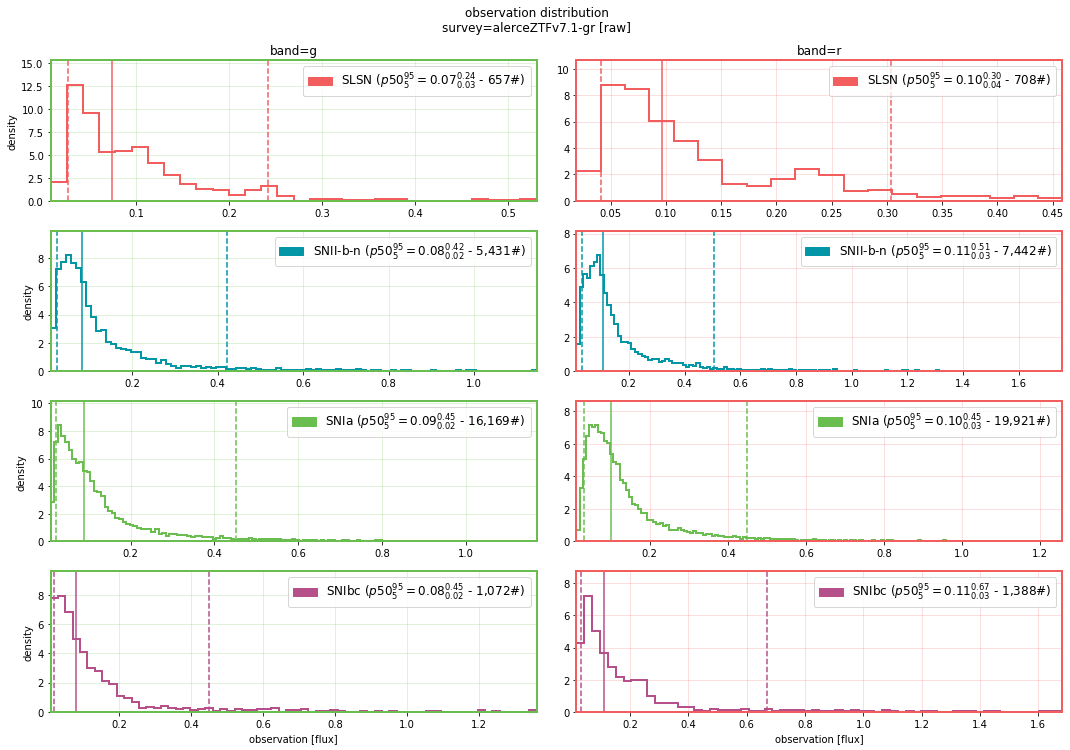

In [70]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.distrs import plot_values_distribution

lcset_name = 'raw'
lcset = lcdataset[lcset_name]
lcset.set_diff_parallel('days')
#print(lcdataset[lcset_name].get_lcobj_names())
#print(lcset['ZTF18aaaqexr'].get_b('g').days)
#print(lcset['ZTF18aaaqexr'].get_b('g').d_days)
title = ''
title += f'observation distribution'+'\n'
title += f'survey={lcset.survey}-{"".join(lcset.band_names)} [{lcset_name}]'+'\n'
kwargs = {
    'title':title[:-1],
    'xlabel':f'observation [flux]',
    'p':1,
}
plot_values_distribution(lcdataset, lcset_name, 'obs', **kwargs)

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.scatters import plot_obs_obse_scatter

plot_obs_obse_scatter(lcdataset, ['0@train', '0@val', '0@test'])